<a href="https://colab.research.google.com/github/iversonzpy/MachineLearning/blob/master/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.stats import norm, stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [0]:
k = 10000 # number of examples
np.random.seed(1)
b = 101
a = -100
x = (b - a) * np.random.rand(k) + a #[-100, 100]
y = 0.2 + 2 * x + x ** 2 + 3 * x ** 3

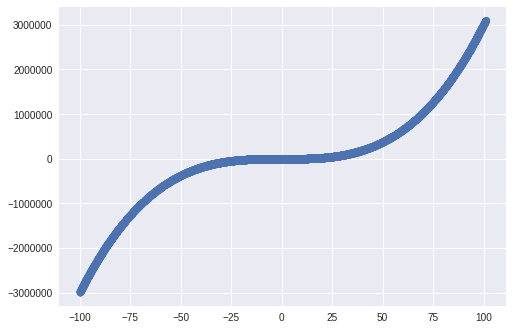

In [74]:
# noise /////////////////////////////////////////
noise = np.random.normal(0, 1, k)
y = y + 500*noise
plt.scatter(x, y)

In [0]:
def mleRegression(var):
    inputs are guesses at our parameters
    yhat = var[0] + var[1] * x + var[2] * x ** 2 + var[3] * x ** 3# use guesses to predict yhat
    L = -np.sum(stats.norm.logpdf(y, loc=yhat, scale=var[4])) #likelihood function
    return L;


In [76]:
guess = np.array([1,1,1,3,100])
result = minimize(mleRegression, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 76363.677057
         Iterations: 440
         Function evaluations: 726


## noise ~ N(0,1) training data number = 100

In [10]:
result

 final_simplex: (array([[0.19475107, 2.00083068, 1.00002666, 2.99999963, 1.07762727],
       [0.19476411, 2.00081608, 1.00002704, 2.99999964, 1.0776282 ],
       [0.19475309, 2.00082825, 1.00002709, 2.99999963, 1.07762718],
       [0.19471473, 2.00087076, 1.00002693, 2.99999963, 1.07762379],
       [0.19477702, 2.00080173, 1.00002721, 2.99999963, 1.07762927],
       [0.19480683, 2.00076902, 1.0000266 , 2.99999964, 1.07763238]]), array([133.27900025, 133.27901948, 133.27902768, 133.27902936,
       133.27908689, 133.279094  ]))
           fun: 133.27900024935914
       message: 'Optimization terminated successfully.'
          nfev: 726
           nit: 431
        status: 0
       success: True
             x: array([0.19475107, 2.00083068, 1.00002666, 2.99999963, 1.07762727])

## noise ~ N(0,1) training data number = 1000

In [52]:
result.x

array([0.17266607, 2.00050475, 1.00002216, 2.99999993, 1.01604205])

## noise ~ N(0, 1) trainning data number = 10000

In [57]:
result.x

array([0.23018354, 1.99983089, 0.99999576, 3.00000004, 1.00279818])

## noise ~ 500 * N(0,1) training data number = 100

In [66]:
result.x

array([-15.06549549,   2.37192501,   1.01548242,   2.99982253,
       443.64257336])

## noise ~ 500 * N(0,1) training data number = 1000

In [72]:
result.x

array([-13.48786548,   2.25385534,   1.01108697,   2.99996303,
       508.00687011])

## noise ~ 500 * N(0,1) training data number = 10000

In [77]:
result.x

array([ 15.31072899,   1.91497722,   0.99787689,   3.00002209,
       501.41249273])